In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [119]:
df=pd.read_csv("train 2.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [120]:
df.shape

(913000, 4)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [122]:
df['date']=pd.to_datetime(df['date'])   #Convert datatype of date to pandas date format

Our Aim is to find Total Sales of each item on each day. We are not considering on Store level sales

In [123]:
df=df.groupby(['date','item'],as_index=False)['sales'].sum()  #we are grouping each item on each day
df.head()

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83


In [124]:
df = df.sort_values('date')  #sort by date

In [125]:
a=list(df['item'].unique())
a.sort()
print("Items that are Present are :",*a,"\n")
print("No of items present :",len(a))

Items that are Present are : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

No of items present : 50


In [126]:
print("There are 50 items , ranging from 1 to 50")
print("Enter the item whose demand in the future we need to predict")
n=int(input()) 
ff=df[df['item']==n]                #here we take item number 45

There are 50 items , ranging from 1 to 50
Enter the item whose demand in the future we need to predict
45


In [127]:
ff.head()

,date,item,sales
44,2013-01-01,45,396
94,2013-01-02,45,393
144,2013-01-03,45,459
194,2013-01-04,45,450
244,2013-01-05,45,533


In [128]:
ff=ff.set_index('date')  #convert date into index column
ff.head()

,item,sales
date,,
2013-01-01,45,396
2013-01-02,45,393
2013-01-03,45,459
2013-01-04,45,450
2013-01-05,45,533


In [129]:
ff.drop(columns=['item',],inplace=True)  #Since We already choosen the item, drop the item column
ff

,sales
date,
2013-01-01,396
2013-01-02,393
2013-01-03,459
2013-01-04,450
2013-01-05,533
...,...
2017-12-27,681
2017-12-28,707
2017-12-29,724


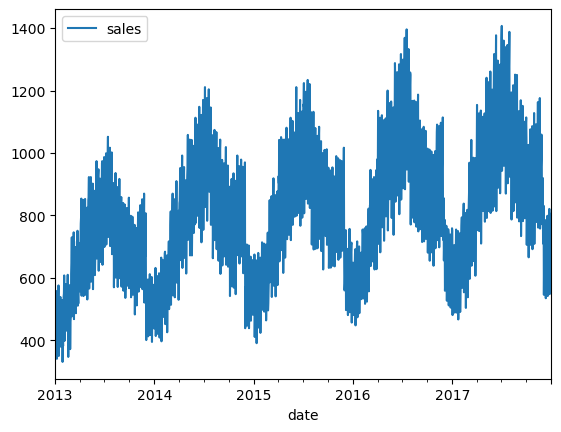

In [130]:
ff.plot();

## Data Engineering: Create New Featues

In [131]:
ff['dayofweek'] = ff.index.dayofweek
ff['quarter'] = ff.index.quarter
ff['month'] = ff.index.month
ff['year'] = ff.index.year
ff['dayofyear'] = ff.index.dayofyear
ff['dayofmonth'] = ff.index.day
ff['weekofyear'] = ff.index.isocalendar().week 

In [132]:
ff.dtypes

sales          int64
dayofweek      int64
quarter        int64
month          int64
year           int64
dayofyear      int64
dayofmonth     int64
weekofyear    UInt32
dtype: object

In [133]:
ff['weekofyear']=ff['weekofyear'].astype("int64")  #We have to change datatype of weekofyear
ff['weekofyear'].dtype

dtype('int64')

In [134]:
ff.columns

Index(['sales', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [135]:
ff=ff[[ 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear','sales']]
ff.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales
date,,,,,,,,
2013-01-01,1,1,1,2013,1,1,1,396
2013-01-02,2,1,1,2013,2,2,1,393
2013-01-03,3,1,1,2013,3,3,1,459
2013-01-04,4,1,1,2013,4,4,1,450
2013-01-05,5,1,1,2013,5,5,1,533


## EDA

### dayofweek

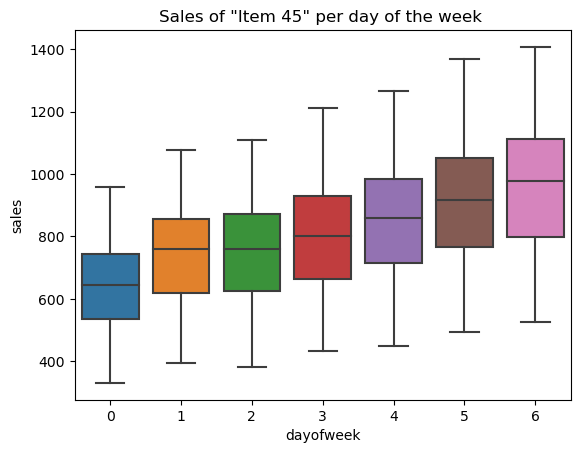

In [166]:
#fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.boxplot(data=ff, x='dayofweek', y='sales')
ax.set_title(f'Sales of "Item {n}" per day of the week ')
plt.show()

Conclusion:
- During weekend there's high sales of this item

### quarter

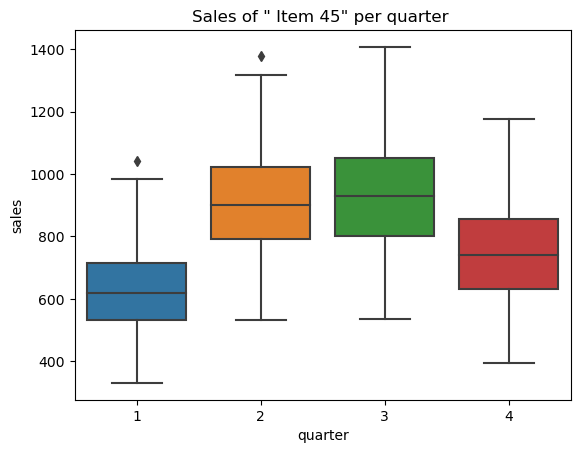

In [167]:
ax=sns.boxplot(data=ff, x='quarter', y='sales')
ax.set_title(f'Sales of " Item {n}" per quarter ')
plt.show()

Conclusion:
- During 2nd and 3rd quarter there's high sales of this item

### month

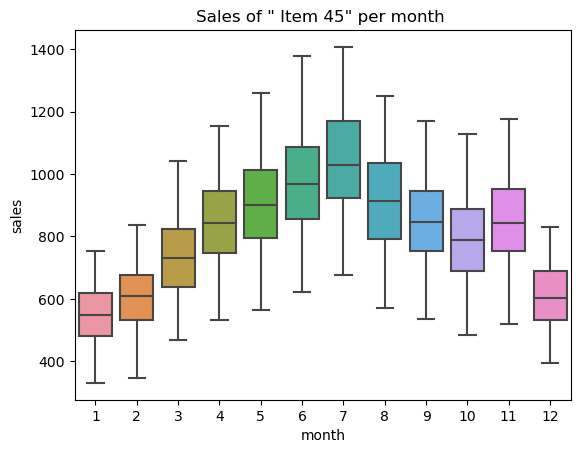

In [168]:
ax=sns.boxplot(data=ff, x='month', y='sales')
ax.set_title(f'Sales of " Item {n}" per month ')
plt.show()

Conclusion:
- During the month of June,July,August there's high sales of this item

### year

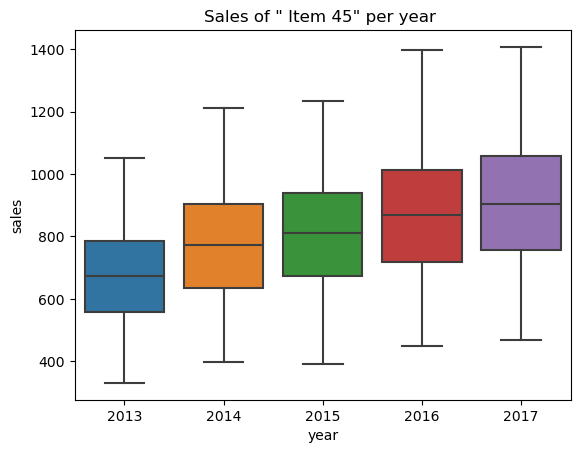

In [169]:
ax=sns.boxplot(data=ff, x='year', y='sales')
ax.set_title(f'Sales of " Item {n}" per year ')
plt.show()

Conclusion:
- Recent year there's increase in sales of this item

### dayofmonth

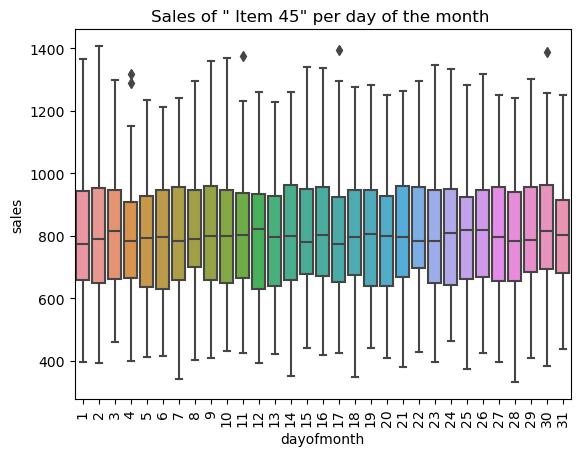

In [170]:
ax=sns.boxplot(data=ff, x='dayofmonth', y='sales')
ax.tick_params(axis='x',rotation=90)
ax.set_title(f'Sales of " Item {n}" per day of the month ')
plt.show()

Conclusion:
- There's no day that we can see affect the increment or decremnet of sales

### dayofyear

In [171]:
df01=ff.groupby(["dayofyear"])["sales"].sum().to_frame()
df01.rename(columns={"job":'count'},inplace=True)
df01.reset_index()

,dayofyear,sales
0,1,2784
1,2,2669
2,3,2840
3,4,2763
4,5,2712
...,...,...
361,362,3004
362,363,2972
363,364,2978
364,365,3111


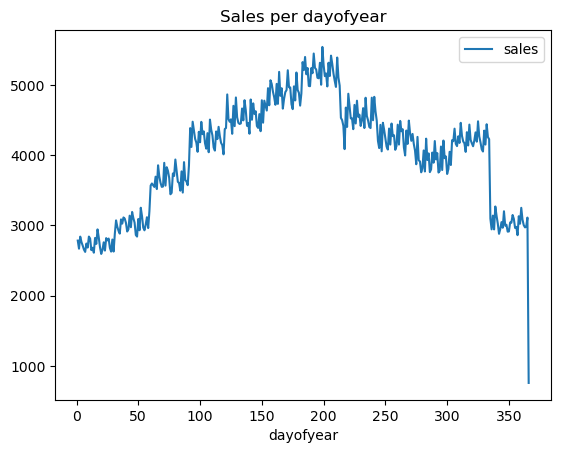

In [172]:
ax=sns.lineplot(data=df01);
ax.set_title('Sales per dayofyear');
#df01.plot();

Conclusion:
- during Middle of the year Sales of this item is increasing

### weekofyear

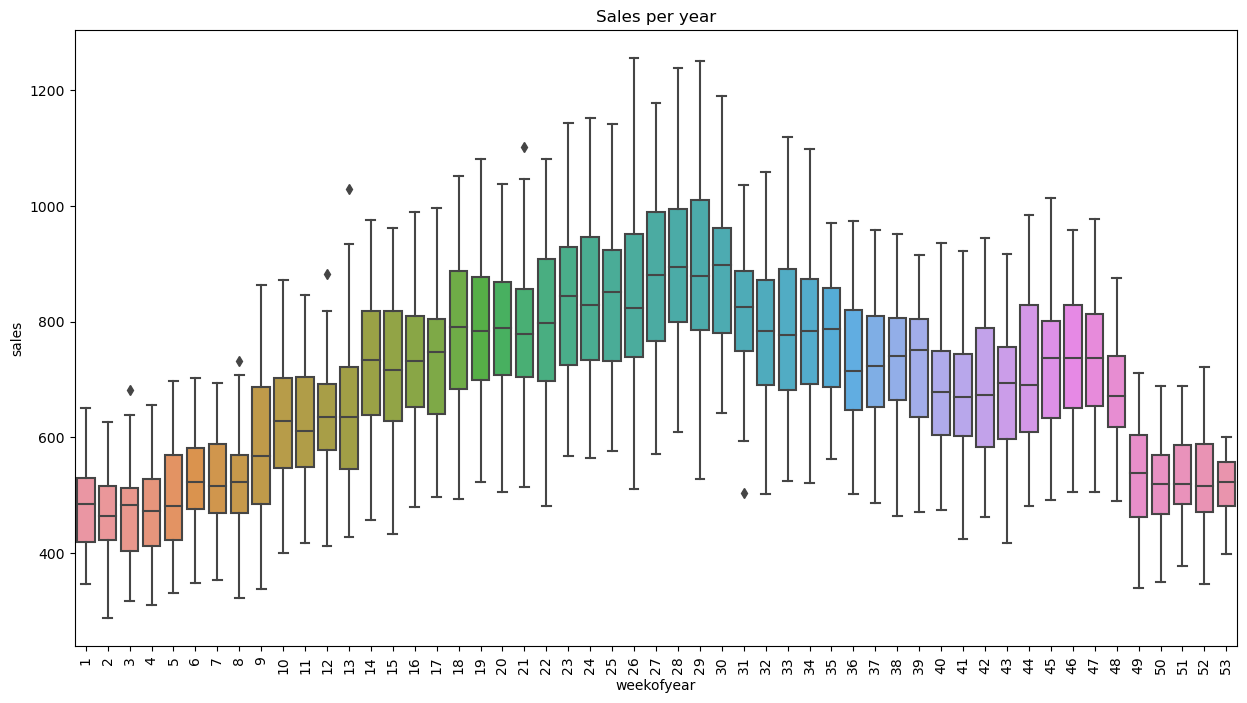

In [67]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(data=ff, x='weekofyear', y='sales')
ax.tick_params(axis='x',rotation=90)
ax.set_title('Sales per week')
plt.show()

Conclusion:
- During week number 29 sales is increasing of this item

## Train Test Split

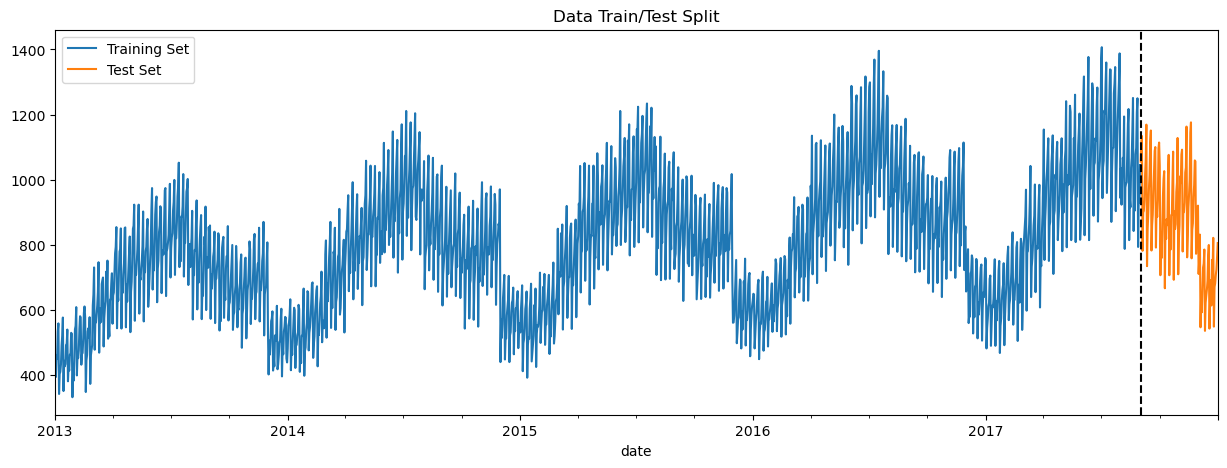

In [175]:
train = ff.loc[ff.index < '2017-09-01','sales']
test = ff.loc[ff.index >= '2017-09-01','sales']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-09-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [176]:
train.head()

date
2013-01-01    396
2013-01-02    393
2013-01-03    459
2013-01-04    450
2013-01-05    533
Name: sales, dtype: int64

In [178]:
train = ff.loc[ff.index < '2017-09-01']
test = ff.loc[ff.index >= '2017-09-01']

In [179]:
train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales
date,,,,,,,,
2013-01-01,1,1,1,2013,1,1,1,396
2013-01-02,2,1,1,2013,2,2,1,393
2013-01-03,3,1,1,2013,3,3,1,459
2013-01-04,4,1,1,2013,4,4,1,450
2013-01-05,5,1,1,2013,5,5,1,533


In [181]:
X_train = train.drop(columns=['sales'])
y_train = train['sales']

X_test = test.drop(columns=['sales'])
y_test = test['sales']
print(train.shape)
print(test.shape)

(1704, 8)
(122, 8)


## XGBoost Regressor

In [182]:
reg = XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:51:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:817.79100	validation_1-rmse:879.50866
[100]	validation_0-rmse:315.42605	validation_1-rmse:347.43838
[200]	validation_0-rmse:135.67569	validation_1-rmse:151.01349
[300]	validation_0-rmse:71.63874	validation_1-rmse:75.04892
[400]	validation_0-rmse:48.11293	validation_1-rmse:53.19579
[500]	validation_0-rmse:37.97966	validation_1-rmse:47.59137
[600]	validation_0-rmse:32.62753	validation_1-rmse:45.32958
[700]	validation_0-rmse:29.65692	validation_1-rmse:43.29224
[800]	validation_0-rmse:28.21629	validation_1-rmse:42.49096
[900]	validation_0-rmse:27.16315	validation_1-rmse:42.21462
[999]	validation_0-rmse:26.49979	validation_1-rmse:41.38534


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

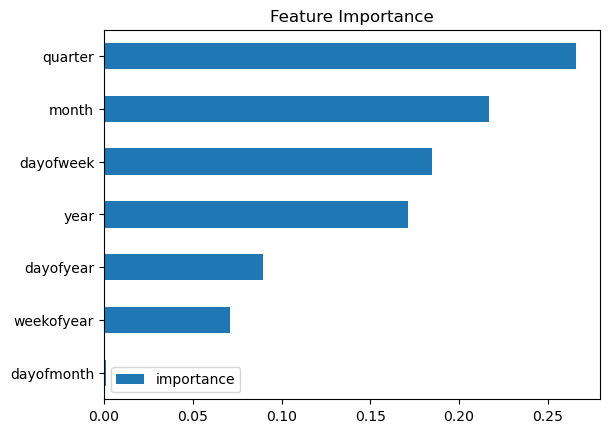

In [183]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\scman\AppData\Local\Temp\ipykernel_18376\43286083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


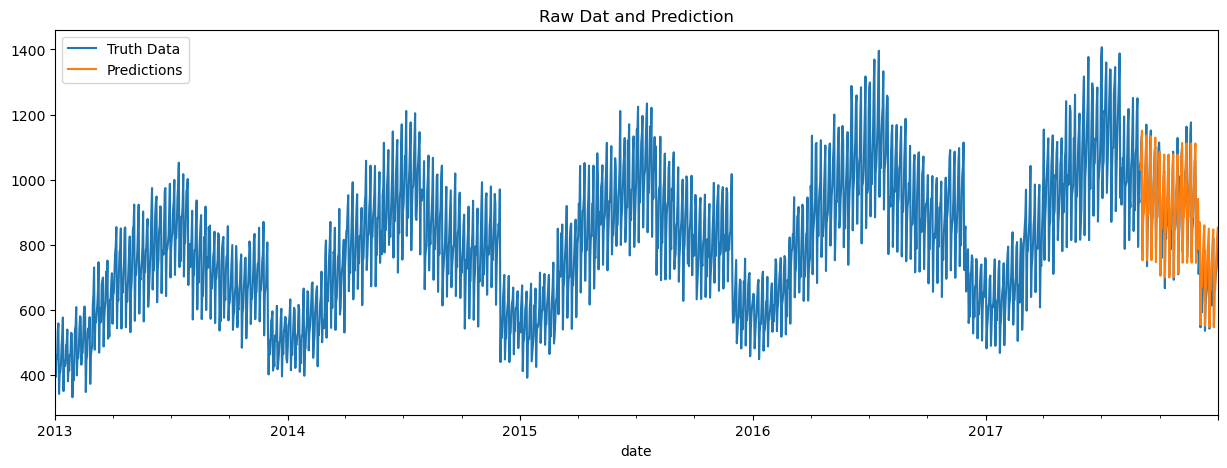

In [186]:
test['prediction'] = reg.predict(X_test)
ff = ff.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = ff[['sales']].plot(figsize=(15, 5))
ff['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [187]:
test.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales,prediction
date,,,,,,,,,
2017-09-01,4,3,9,2017,244,1,35,1055,1030.539917
2017-09-02,5,3,9,2017,245,2,35,1112,1089.621094
2017-09-03,6,3,9,2017,246,3,35,1134,1150.576660
2017-09-04,0,3,9,2017,247,4,36,781,751.715210
2017-09-05,1,3,9,2017,248,5,36,899,889.425354


In [188]:
score = np.sqrt(mean_squared_error(test['sales'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 41.39


In [189]:
test.loc[:,'error'] = abs(test['sales'] - test['prediction'])
test.head()

C:\Users\scman\AppData\Local\Temp\ipykernel_18376\3244340597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'error'] = abs(test['sales'] - test['prediction'])


,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales,prediction,error
date,,,,,,,,,,
2017-09-01,4,3,9,2017,244,1,35,1055,1030.539917,24.460083
2017-09-02,5,3,9,2017,245,2,35,1112,1089.621094,22.378906
2017-09-03,6,3,9,2017,246,3,35,1134,1150.576660,16.576660
2017-09-04,0,3,9,2017,247,4,36,781,751.715210,29.284790
2017-09-05,1,3,9,2017,248,5,36,899,889.425354,9.574646


In [190]:
test.sort_values(by='error',ascending=False)

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales,prediction,error
date,,,,,,,,,,
2017-12-21,3,4,12,2017,355,21,51,613,728.016174,115.016174
2017-10-13,4,4,10,2017,286,13,41,860,959.934143,99.934143
2017-09-29,4,3,9,2017,272,29,39,1096,997.829712,98.170288
2017-12-23,5,4,12,2017,357,23,51,725,815.984802,90.984802
2017-10-04,2,4,10,2017,277,4,40,759,849.599121,90.599121
...,...,...,...,...,...,...,...,...,...,...
2017-10-27,4,4,10,2017,300,27,43,962,959.939758,2.060242
2017-10-25,2,4,10,2017,298,25,43,848,846.226562,1.773438
2017-10-02,0,4,10,2017,275,2,40,706,704.599792,1.400208


In [191]:
test['sales'].sum()

106601

In [193]:
from math import ceil
ceil(test['prediction'].sum())

108126